##**The Sparks Foundation - GRIP - Data Science and Business Analytics - JAN'2022**

# Task1 : prediction using Supervised Machine Learning
## By : Abhay Kewati
 Dataset used : "http://bit.ly/w-data"

This is simple linear regression task as it involved just two variables. In this task we just have to predict the percentage of student based on no. of study hours

### Importing Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import sklearn.metrics as metrics
%matplotlib inline

### loading the Dataset

In [24]:
df=pd.read_csv("http://bit.ly/w-data%22")
df.head(5)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [26]:
# check columns variables
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [27]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [28]:
# check the data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
# Find missing values
missed_value = df.isnull().sum().sum()
print(f'The total number of missing values is: {missed_value}')

The total number of missing values is: 0


### Visualising the data

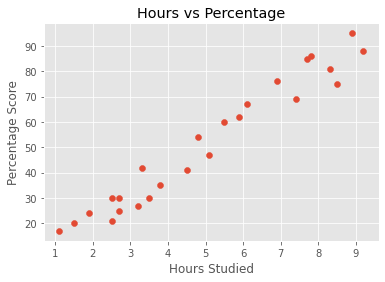

In [30]:
# Plotting the distribution of scores
plt.scatter(x='Hours', y='Scores', data=df)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

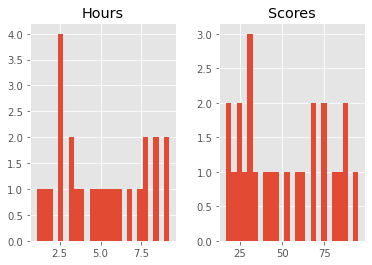

In [31]:
# Histogram
df.hist(bins=25)
plt.show()

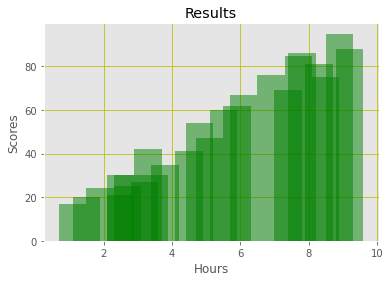

In [32]:
# Plotting the distribution of score with bar chart
style.use('ggplot')
plt.bar(df.Hours, df.Scores, color='green', alpha=0.5)
plt.title('Results')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True, color='y')
plt.show()

We can see that the score increase with the hour.

### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [33]:
X = df.Hours.values
y = df.Scores.values

### Splitting Data
To understand model performance,we need to dividing the dataset into a training set and a test set

I have split the dataset by using function train_test_split().

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [35]:
# Check the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17,)
(8,)
(17,)
(8,)


In [36]:
# reshaping
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)

(17, 1)
(8, 1)


### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [37]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

print("Training complete.")

Training complete.


In [38]:
print(f'score:{ regressor.score(X_train, y_train):.3f}')
print('coefficients: ',regressor.coef_)
print('Intercept: ', regressor.intercept_)

score:0.968
coefficients:  [10.41075981]
Intercept:  -1.5123061161277889


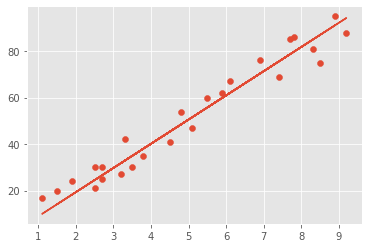

In [39]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Evaluating Model
Accuracy can be computed by comparing actual test set values and predicted values

In [40]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'The r2 score is:{r2 : .2f}')
print(f'The meam absolute error is:{mae:.2f}')
print(f'The mean absolute percentage error is:{mape:.2f}')

The r2 score is: 0.89
The meam absolute error is:7.17
The mean absolute percentage error is:0.17


### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [41]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]
 [7.4]]


In [42]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


In [43]:
hours = np.array(9.25).reshape(-1,1)
pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred))

No of Hours = [[9.25]]
Predicted Score = [94.78722213]
